FWI of **2.5D Marmousi** test dataset © 2019 Kajetan Chrapkiewicz.

##### Setup

###### Global variables

In [1]:
# rawsign = 'wavelets/RawSign.sgy'
rawsign = 'bckp/MarmAIT-RawSign.sgy'
startvp = 'bckp/MarmAIT-StartVp.vtr'
truevp = 'bckp/MarmAIT-TrueVp.vtr'
sp = 'bckp/MarmAIT-SegyPrep.key'
psrcs = 'bckp/MarmAIT-PointSources.pgy'
precs = 'bckp/MarmAIT-PointReceivers.pgy'
sign = 'bckp/MarmAIT-SourceSig-Time.ttr'
templ = 'bckp/MarmAIT-Observed-0000.ttr'
runfile = 'bckp/MarmAIT-Runfile.key'

###### Notebook setup

In [ ]:
# %load ~/software/fullwavepy/nb_config.py
# -----------------------------------------------------------------------------
# Load default notebook's callables (defined in fullwavepy/__init__.py)
# -----------------------------------------------------------------------------
from fullwavepy import *

# -----------------------------------------------------------------------------
# Configure matplotlib
# -----------------------------------------------------------------------------

# Set matplotlib's backend ------

# 1. non-interactive plots, display in a notebook cell
%matplotlib inline

# 2. interactivfullwavepy.plots, display in a notebook cell
 # %matplotlib notebook

# Set matplotlib.pyplot's style ---------
plt.style.reload_library()

# Combine styles (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available)

# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
from fullwavepy.logging_config import *
log_lvl(INFO) # TRACE / DEBUG / INFO / WARNING / ERROR / CRITICAL

# -----------------------------------------------------------------------------
# Other notebook's configuration
# -----------------------------------------------------------------------------

# autocompleting
%config IPCompleter.greedy=True 

# automatically reload modules before execution
%load_ext autoreload
%autoreload 2

# Synthetic 

## (p01) 93 srcs, 2159 recs

In [4]:
# proj = ProjSyn('p01', exe=exe, io='fw3d') #, box=box, dx=dx, ns=ns, dt=dt, )

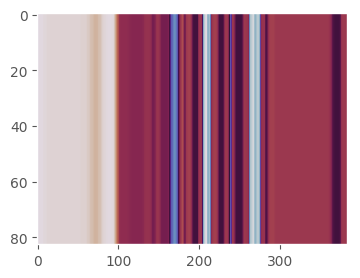

In [8]:
proj.inp.truevp.prepare(copy=truevp)
proj.inp.truevp.plot(scoord='z')

In [22]:
# proj.inp.sp.prepare(copy=sp)

In [44]:
# proj.inp.s.prepare(copy=psrcs)
# proj.inp.r.prepare(copy=precs)
# proj.inp.signature.prepare(copy=sign)
!cp bckp/MarmAIT-Observed-0000.ttr {proj.inp.path+proj.name+'-Observed-0000.ttr'}

In [25]:
# proj.inp.runfile.prepare(copy=runfile)

In [2]:
# proj.inp.pbs.prepare(select=4, mpiprocs=8, q='general')

### Old

In [9]:
# proj.out.synth.line

In [1]:
# p01_sp_kwargs = {'geometry': 'regular', 
#                  'geometry_in_nodes': True,
#                  'souz': 1.0, 'recz': 1.0, 
#                  'soux0': 8.0, 'recx0': 3.0,
#                  'soudx': 4.0, 'recdx': 3.0, 
#                  'sounx': 93, 'recnx': 127, 
#                  'souy0': 42.0, 'recy0': 18.0,
#                  'soudy': 1, 'recdy': 3.0, 
#                  'souny': 1, 'recny': 17,                  
#                  'cat': 1}

In [170]:
ns = 3300  
dt = 6 / ns
dx = 24.0
box = [0, (384-1)*dx, 0, (83-1)*dx, 0, (92-1)*dx]

proj = ProjSynVsObs('p01', io='sgy', box=box, dx=dx, ns=ns, dt=dt, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p01/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [150]:
# proj.inp.truevp.prepare(source=truevp)
# proj.inp.truevp.plot()
# proj.inp.rawsign.prepare(source=rawsign)
# plt.figure()
# proj.inp.rawsign.plot()

# proj.inp.sp.prepare(**p01_sp_kwargs)
# proj.inp.sp.run(cat=1)
# proj.inp.runfile.prepare(b_top=20, e_top=30, b_abs=20, e_abs=30, 
#                          velcut=1501, gvel=1550, minvc=1500, maxvc=4500, cat=0)
# proj.inp.pbs.prepare(select=2, mpiprocs=20, q='pqmrwarn', cat=1)

## (p03)

In [1]:
# box03 = [0, 100*dx, 0, 20*dx, 0, 40*dx]
# proj = ProjSynVsObs('p03', io='sgy', box=box03, dx=dx, ns=ns, dt=dt, exe=exe)

In [167]:
# proj.inp.truevp.prepare(source=truevp)
# proj.inp.truevp.plot()
# proj.inp.rawsign.prepare(source=rawsign)
# plt.figure()
# proj.inp.rawsign.plot()

# proj.inp.sp.prepare(**p01_sp_kwargs)
# proj.inp.sp.run(cat=1)
# proj.inp.runfile.prepare(b_top=20, e_top=30, b_abs=20, e_abs=30, 
#                          velcut=1501, gvel=1550, minvc=1500, maxvc=4500, cat=0)
# proj.inp.pbs.prepare(select=2, mpiprocs=20, q='pqmrwarn', cat=1)

In [157]:
A = read_vtr('models/TrueVp.vtr')
A.shape
# plt.imshow(A[0].T)
# plt.imshow(A[:, 0].T)

(384, 83, 92)

In [161]:
B = A[0:101, 0:21, 0:41]
save_vtr(B, 'p03/inp/p03-TrueVp.vtr')
# B.shape
# plt.imshow(B[0].T)

In [125]:
# c = read_txt('models/tmp10_sx.txt')
# c = [int(i[0]) for i in c]
# plt.plot(c, '.')
# plt.xlim(0,1000)

In [126]:
# c = read_txt('models/tmp10_sy.txt')
# c = [int(i[0]) for i in c]
# plt.plot(c, '.')
# plt.xlim(0,1000)

In [124]:
# plot('models/win10.sgy', nx=21)

## (p05) moved from fwi_marm_AIT

In [ ]:
ns = 3300  
dt = 6 / ns
dx = 24.0
box = [0, 384*dx, 0, 83*dx, 0, 92*dx]
timespace = [box, dx, ns, dt]

In [ ]:
proj = ProjSyn('p05', io='fw3d', box=box, dx=dx, ns=ns, dt=dt, exe=exe)

# Inversion

## (p02) 93 srcs, 2159 recs

In [5]:
env = {'SCHEDULER_DUMPPREC': 'yes', 'SLAVES_DUMPCSREFS': '1,91,185'}
proj = ProjInv('p02', exe=exe, io='fw3d', dt=0.00181818181, env=env)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p02/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: fw3d
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False

INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping


In [7]:
proj.inp.startvp.prepare(copy=startvp)
proj.inp.s.prepare(copy=psrcs, cat=0)
proj.inp.r.prepare(copy=precs, cat=0)
proj.inp.signature.prepare(copy=sign)
# !cp bckp/MarmAIT-Observed-0000.ttr {proj.inp.path+proj.name+'-Observed-0000.ttr'}

In [13]:
# proj.inp.obser.prepare(copy='p01/out/p01-Observed-Time.ttr')
# !cp p01/out/p01-Observed-Time.ttm p02/inp/p02-Observed-Time.ttm

In [7]:
# proj.inp.pbs.prepare(hours=10, select=16, mpiprocs=8, q='general')

In [27]:
proj.out.vp.plot_all()

In [12]:
# plot('p02/inp/p02-StartVp.vtr')

In [13]:
# plot('p02/out/p02-CP00025-Vp.vtr')

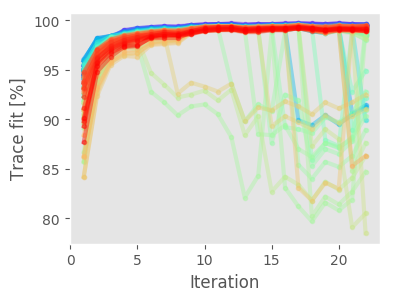

In [15]:
proj.out.functional.plot()

In [49]:
# proj.inp.signature.plot()

In [51]:
# plot(rawsign)

INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


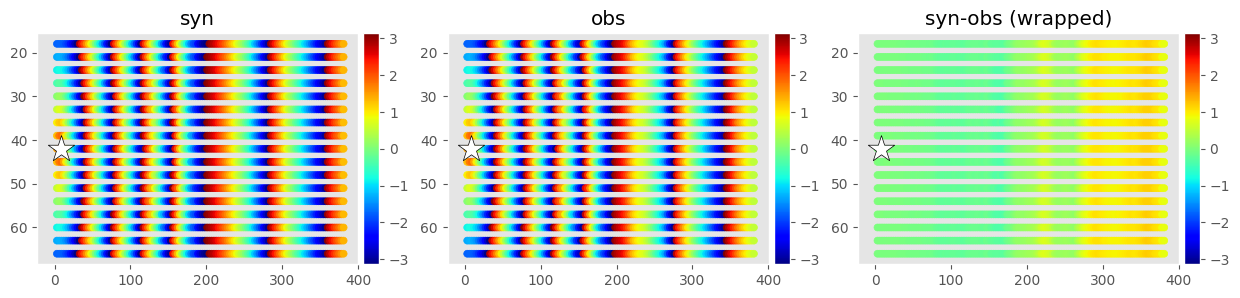

In [27]:
proj.out.dumpcomp.it[1][1].plot_phase(2)

In [7]:
for sid in [1]:
    for it in range(1, 12):
        for freq in [4]:  #range(2,10):
            print(sid, freq, it)
#             plt.figure(figsize=[30,30])
            title = 'sid_' + str(sid).rjust(2,'0') + '_it' + str(it).rjust(2,'0') + '_freq' + str(freq)
            proj.out.dumpcomp.it[it][sid].plot_phase(freq)
            plt.savefig(title)
            plt.close()
#             break
#         break
#     break

1 2 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 3 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 4 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 5 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 6 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 7 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 8 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 9 1
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


1 2 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 3 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 4 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 5 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 6 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 7 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 8 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 9 2
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00002fwd1.ttr contains all receivers


1 2 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 3 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 4 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 5 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 6 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 7 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 8 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 9 3
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00003fwd1.ttr contains all receivers


1 2 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 3 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 4 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 5 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 6 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 7 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 8 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 9 4
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00004fwd1.ttr contains all receivers


1 2 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 3 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 4 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 5 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 6 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 7 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 8 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 9 5
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00005fwd1.ttr contains all receivers


1 2 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 3 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 4 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 5 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 6 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 7 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 8 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 9 6
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00006fwd1.ttr contains all receivers


1 2 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 3 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 4 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 5 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 6 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 7 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 8 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 9 7
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00007fwd1.ttr contains all receivers


1 2 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 3 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 4 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 5 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 6 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 7 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 8 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 9 8
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00008fwd1.ttr contains all receivers


1 2 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 3 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 4 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 5 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 6 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 7 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 8 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 9 9
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00009fwd1.ttr contains all receivers


1 2 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 3 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 4 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 5 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 6 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 7 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 8 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 9 10
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00010fwd1.ttr contains all receivers


1 2 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 3 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 4 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 5 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 6 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 7 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 8 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 9 11
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00011fwd1.ttr contains all receivers


1 2 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 3 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 4 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 5 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 6 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 7 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 8 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 9 12
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00012fwd1.ttr contains all receivers


1 2 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 3 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 4 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 5 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 6 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 7 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 8 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 9 13
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00013fwd1.ttr contains all receivers


1 2 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 3 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 4 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 5 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 6 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 7 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 8 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 9 14
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00014fwd1.ttr contains all receivers


1 2 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 3 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 4 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 5 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 6 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 7 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 8 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 9 15
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00015fwd1.ttr contains all receivers


1 2 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 3 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 4 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 5 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 6 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 7 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 8 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 9 16
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00016fwd1.ttr contains all receivers


1 2 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 3 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 4 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 5 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 6 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 7 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 8 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 9 17
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00017fwd1.ttr contains all receivers


1 2 18
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00018fwd1.ttr


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00018fwd1.ttr contains all receivers


1 3 18
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00018fwd1.ttr


OSError: [Errno 12] Cannot allocate memory

INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


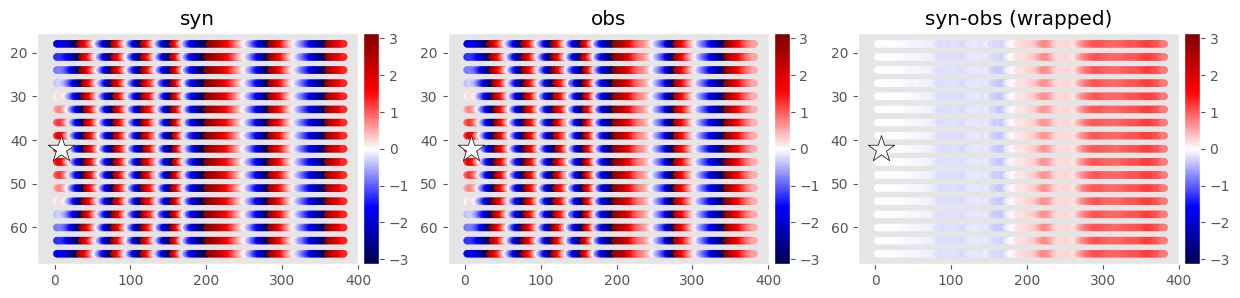

In [13]:
proj.out.dumpcomp.it[1][1].plot_phase(2, scatt_cmap='seismic')

INFO:fullwavepy.project.datafiles.DumpCompareFile._get_phase: Getting phase info from ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr


Function modify_array() took 0.03402244299650192 s to run
Function read_arrays() took 4.766366287134588 s to run
INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


Function plot_phase() took 14.600024924613535 s to run


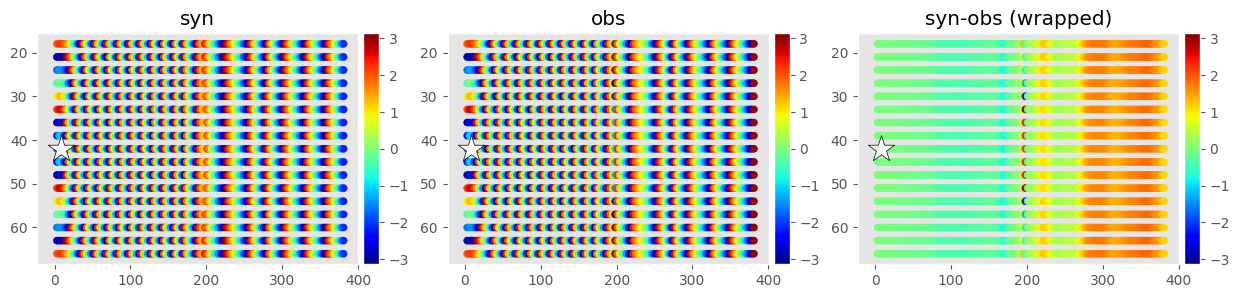

In [10]:
proj.out.dumpcomp.it[1][1].plot_phase(5, timer=True)

INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00091-iter00001fwd1.ttr contains all receivers


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


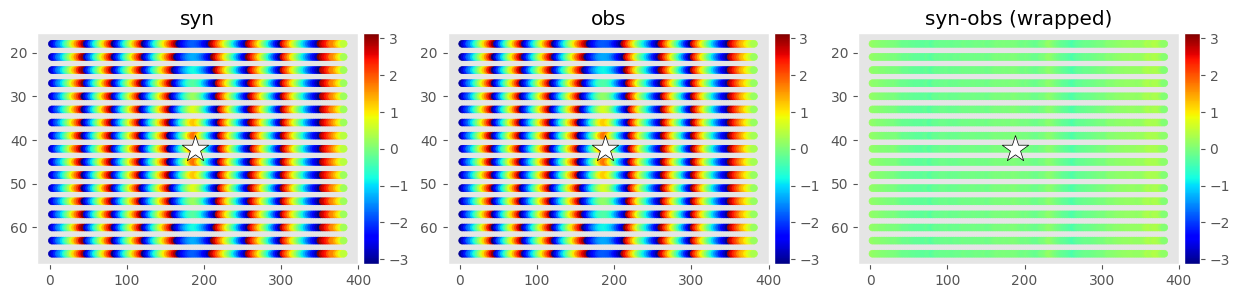

In [12]:
proj.out.dumpcomp.it[1][91].plot_phase(2)
# plt.gca().set_aspect('equal')

INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p02//out/p02-SLAVES_DUMPCOMPARE-csref00091-iter00025fwd1.ttr contains all receivers


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


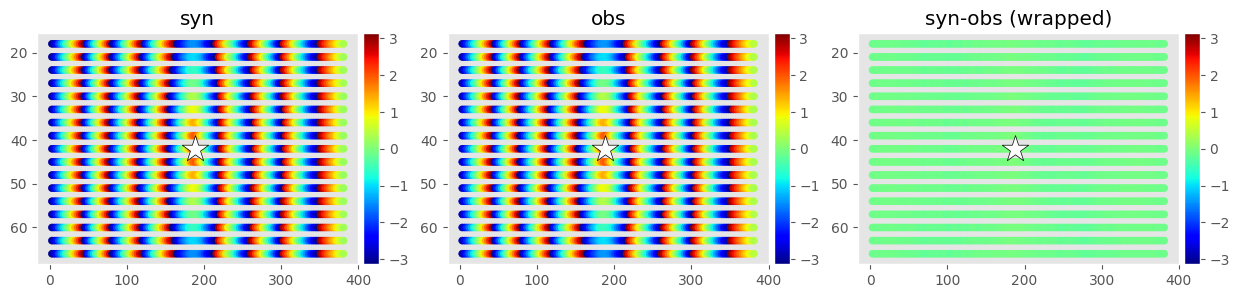

In [11]:
proj.out.dumpcomp.it[25][91].plot_phase(2)
# plt.gca().set_aspect('equal')

(0, 100)

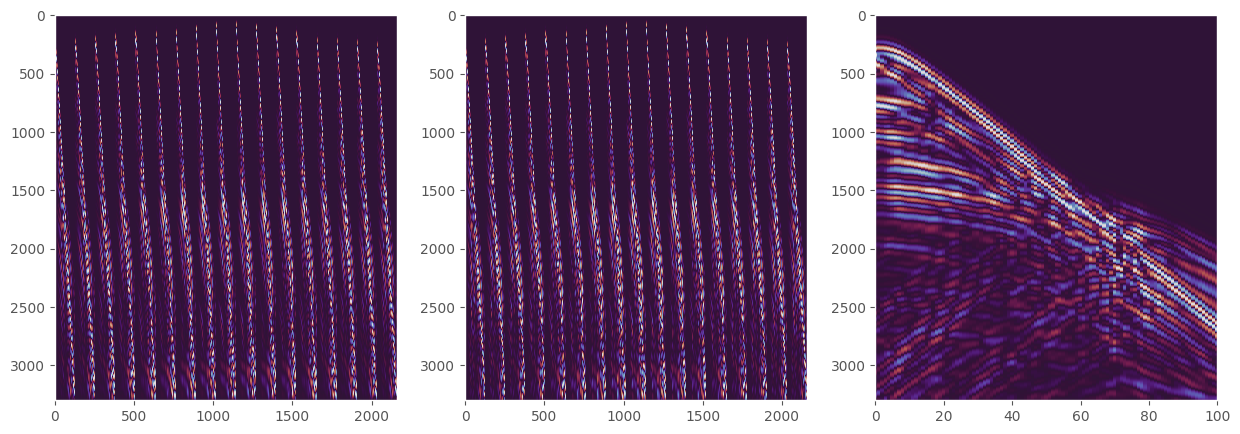

In [45]:
proj.out.dumpcomp.it[1][1].plot(norm='max')
plt.xlim(0,100)

In [8]:
srcs = proj.inp.s.read()
recs = proj.inp.r.read()

In [9]:
x, y, c = [], [], []
fun = proj.out.functional.read()
for sid, xyz in srcs.items():
    x.append(xyz[0])
    y.append(xyz[1])
    c.append(fun[int(sid)])

In [1]:
# for it in range(0,26):
#     plt.figure(figsize=[15,3])
#     title = str('iteration_'+ str(it+1).rjust(2,'0'))
#     plt.title(title)
#     plt.scatter(x,y, c=[i[it] for i in c], cmap='YlGnBu_r',vmin=80,vmax=100)
#     plt.xlabel('in-line node')
#     plt.ylabel('cross-line node')
#     plt.colorbar()
#     plt.savefig(title)
#     plt.close()
#     break

In [ ]:
for i, _ in enumerate(proj.out.grad.it):
    if proj.out.grad.it[i] is None:
        continue
    print(str(i).rjust(3,'0'))
    plt.figure(figsize=[10,5])
    plt.title('iteration ' + str(i))
    proj.out.grad.it[i].plot(cbar=1)
    plt.xlabel('in-line node')
    plt.ylabel('depth node')
    plt.gca().set_aspect('equal')
    plt.savefig('grad_'+str(i).rjust(3,'0'))
    plt.close()

## (p06) moved from fwi_marm_AIT

In [ ]:
proj = ProjInv('p06', io='fw3d', box=box, dx=dx, ns=ns, dt=dt, exe=exe, 
               info="Tomography with half the number of sources.")

# ...